In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import tensorflow as tf
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import sys
sys.path.append('../../Main/')

In [13]:
from load_model import LoadModel
from stag_mag import calculate_stag_mag
from sigma_x import calculate_sigma_x
from energy_func import buildlattice, construct_mats
from dset_helpers import load_KZ_QMC_uncorr_data_from_batches,data_given_param

# Load Stag Mags & Sig Xs (on cluster)

In [5]:
deltas = np.arange(-1.545,13.455,0.5)

In [15]:
sms_vmc1=np.load('../data/observables/sms_vmc1.npy')
sms_vmc1_vars=np.load('../data/observables/sms_vmc1_vars.npy')
sms_h1=np.load('../data/observables/sms_h1.npy')
sms_h1_vars=np.load('../data/observables/sms_h1_vars.npy')
sxs_vmc1=np.load('../data/observables/sxs_vmc1.npy')
sxs_vmc1_vars=np.load('../data/observables/sxs_vmc1_vars.npy')
sxs_h1=np.load('../data/observables/sxs_h1.npy')
sxs_h1_vars=np.load('../data/observables/sxs_h1_vars.npy')

sms_vmc2=np.load('../data/observables/sms_vmc2.npy')
sms_vmc2_vars=np.load('../data/observables/sms_vmc2_vars.npy')
sms_h2=np.load('../data/observables/sms_h2.npy')
sms_h2_vars=np.load('../data/observables/sms_h2_vars.npy')
sxs_vmc2=np.load('../data/observables/sxs_vmc2.npy')
sxs_vmc2_vars=np.load('../data/observables/sxs_vmc2_vars.npy')
sxs_h2=np.load('../data/observables/sxs_h2.npy')
sxs_h2_vars=np.load('../data/observables/sxs_h2_vars.npy')

sms_vmc1=np.append(sms_vmc1,np.load('../data/observables/sms_vmc12.npy'))
sms_vmc1_vars=np.append(sms_vmc1_vars,np.load('../data/observables/sms_vmc1_vars2.npy'))
sms_h1=np.append(sms_h1,np.load('../data/observables/sms_h12.npy'))
sms_h1_vars=np.append(sms_h1_vars,np.load('../data/observables/sms_h1_vars2.npy'))
sxs_vmc1=np.append(sxs_vmc1,np.load('../data/observables/sxs_vmc12.npy'))
sxs_vmc1_vars=np.append(sxs_vmc1_vars,np.load('../data/observables/sxs_vmc1_vars2.npy'))
sxs_h1=np.append(sxs_h1,np.load('../data/observables/sxs_h12.npy'))
sxs_h1_vars=np.append(sxs_h1_vars,np.load('../data/observables/sxs_h1_vars2.npy'))

sms_vmc2=np.append(sms_vmc2,np.load('../data/observables/sms_vmc22.npy'))
sms_vmc2_vars=np.append(sms_vmc2_vars,np.load('../data/observables/sms_vmc2_vars2.npy'))
sms_h2=np.append(sms_h2,np.load('../data/observables/sms_h22.npy'))
sms_h2_vars=np.append(sms_h2_vars,np.load('../data/observables/sms_h2_vars2.npy'))
sxs_vmc2=np.append(sxs_vmc2,np.load('../data/observables/sxs_vmc22.npy'))
sxs_vmc2_vars=np.append(sxs_vmc2_vars,np.load('../data/observables/sxs_vmc2_vars2.npy'))
sxs_h2=np.append(sxs_h2,np.load('../data/observables/sxs_h22.npy'))
sxs_h2_vars=np.append(sxs_h2_vars,np.load('../data/observables/sxs_h2_vars2.npy'))

# Plot (on cluster)

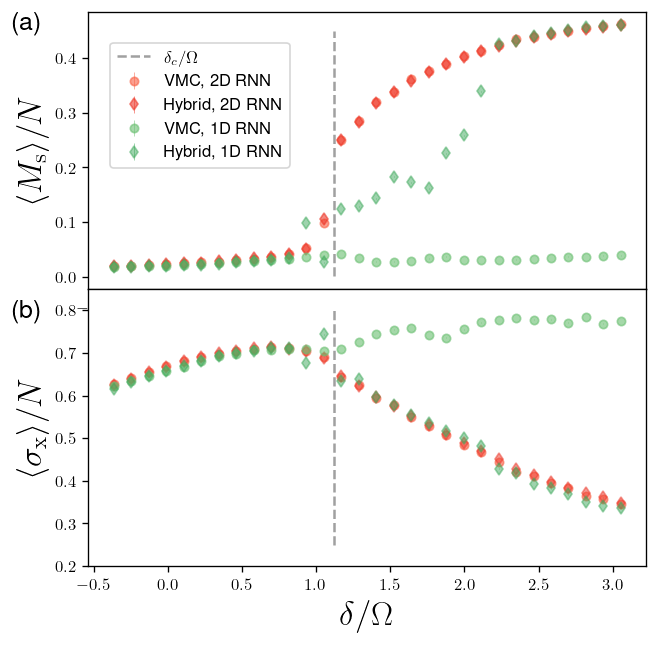

In [18]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})

fig = plt.figure(1,figsize=(6,6), dpi=120, facecolor='w', edgecolor='k')
grid = plt.GridSpec(2, 1, wspace=0.4, hspace=0)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0],sharex=ax1)
greens = plt.get_cmap('Greens')
colors1 = greens(np.linspace(0, 1, 20))[10:]
reds = plt.get_cmap('Reds')
colors2 = reds(np.linspace(0, 1, 20))[10:]
# colors1 = sns.color_palette('pastel')
# colors2 = sns.color_palette('dark')
d_o = np.array((np.arange(-1.545,13.456,0.5)/4.24))[0:30]

# stag mags
# ax1.errorbar(d_o, chks, yerr=chk_errors, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3',label="QMC")
ax1.errorbar(d_o, sms_vmc2, yerr=np.sqrt(sms_vmc2_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors2[0], markeredgecolor=colors2[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[0],label ="VMC, 2D RNN")
ax1.errorbar(d_o, sms_h2, yerr=np.sqrt(sms_h2_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors2[2], markeredgecolor=colors2[2], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[2],label ="Hybrid, 2D RNN")
ax1.errorbar(d_o, sms_vmc1, yerr=np.sqrt(sms_vmc1_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors1[0], markeredgecolor=colors1[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors1[0],label ="VMC, 1D RNN")
# ax1.errorbar(d_o, exp_data_stagmags, yerr=np.sqrt(exp_data_vars)/np.sqrt(1000), marker='s', markerfacecolor='C1', markeredgecolor='C1', markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color='C1',label="Experimental Data")
ax1.errorbar(d_o, sms_h1, yerr=np.sqrt(sms_h1_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors1[2], markeredgecolor=colors1[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors1[2],label ="Hybrid, 1D RNN")

ax1.vlines(4.765/4.24,0.001,0.45,linestyle='--',color='grey',alpha=0.75,label ='$\\delta_c/\\Omega$')
ax1.set_ylabel('$\\langle M_{\mathrm{s}} \\rangle/N$',fontsize=20)
ax1.text(-1.05, 0.45, "(a)",fontsize=15)

    
# sigma x
ax2.errorbar(d_o, sxs_vmc2, yerr=np.sqrt(sxs_vmc2_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors2[0], markeredgecolor=colors2[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[0])
ax2.errorbar(d_o, sxs_h2, yerr=np.sqrt(sxs_h2_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors2[2], markeredgecolor=colors2[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors2[2])
ax2.errorbar(d_o, sxs_vmc1, yerr=np.sqrt(sxs_vmc1_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors1[0], markeredgecolor=colors1[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors1[0])
ax2.errorbar(d_o, sxs_h1, yerr=np.sqrt(sxs_h1_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors1[2], markeredgecolor=colors1[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors1[2])

ax2.vlines(4.765/4.24,0.25,0.8,linestyle='--',color='grey',alpha=0.75)
ax2.set_ylabel('$\\langle \\sigma_{\mathrm{x}} \\rangle/N$',fontsize=20)
ax2.set_ylim(0.2,0.85)
ax2.text(-1.05, 0.78, "(b)",fontsize=15)

fig.legend(loc='center', bbox_to_anchor=(0.28, 0.75))
plt.xlabel('$ \delta/\\Omega $',fontsize=20)
plt.show()

# Load data and plot (local)

In [5]:
deltas = np.arange(-1.545,13.455,0.5)

In [8]:
sms_vmc1=np.load('../data/observables/sms_vmc1_all.npy')
sms_vmc1_vars=np.load('../data/observables/sms_vmc1_vars_all.npy')
sms_h1=np.load('../data/observables/sms_h1_all.npy')
sms_h1_vars=np.load('../data/observables/sms_h1_vars_all.npy')
sxs_vmc1=np.load('../data/observables/sxs_vmc1_all.npy')
sxs_vmc1_vars=np.load('../data/observables/sxs_vmc1_vars_all.npy')
sxs_h1=np.load('../data/observables/sxs_h1_all.npy')
sxs_h1_vars=np.load('../data/observables/sxs_h1_vars_all.npy')

sms_vmc2=np.load('../data/observables/sms_vmc2_all.npy')
sms_vmc2_vars=np.load('../data/observables/sms_vmc2_vars_all.npy')
sms_h2=np.load('../data/observables/sms_h2_all.npy')
sms_h2_vars=np.load('../data/observables/sms_h2_vars_all.npy')
sxs_vmc2=np.load('../data/observables/sxs_vmc2_all.npy')
sxs_vmc2_vars=np.load('../data/observables/sxs_vmc2_vars_all.npy')
sxs_h2=np.load('../data/observables/sxs_h2_all.npy')
sxs_h2_vars=np.load('../data/observables/sxs_h2_vars_all.npy')

In [12]:
df = pd.read_csv('./../../Data/QMC_Data/kz_qmc_samples/avg_observables.csv', sep=',')
deltas = np.array(df["delta"])
energies = np.array(df["energy"])
e_errors = np.array(df["energy_error"])
chks = np.array(df["chk"])
chk_errors = np.array(df["chk_error"])

In [17]:
deltas = np.arange(-1.545,13.5,0.5)
exp_stagmags = []
exp_vars = []

for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    Exp_data = data_given_param(15,delta,Lx)
    Exp_data = np.reshape(Exp_data,(16**2,1000)).T
    all_exp_stagmags,_,Exp_data_stagmag,expvar = calculate_stag_mag(16,16,Exp_data)
    exp_stagmags.append(Exp_data_stagmag)
    exp_vars.append(expvar)


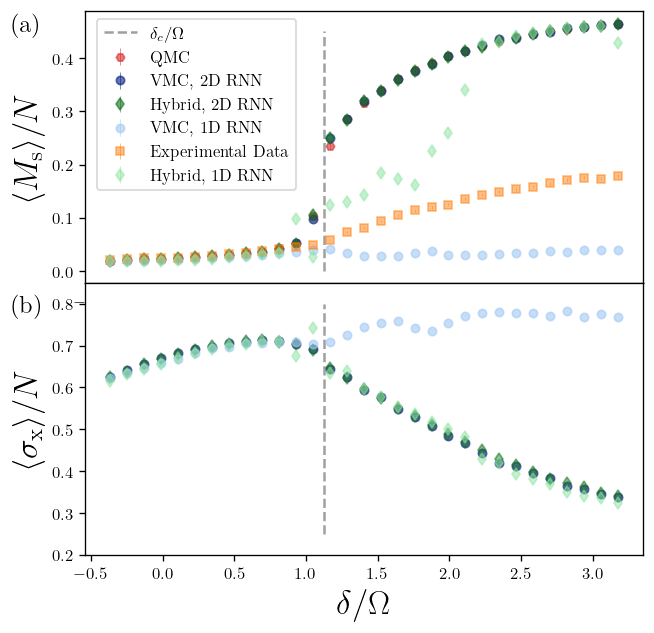

In [20]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})

fig = plt.figure(1,figsize=(6,6), dpi=120, facecolor='w', edgecolor='k')
grid = plt.GridSpec(2, 1, wspace=0.4, hspace=0)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0],sharex=ax1)
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')
d_o = deltas/4.24

# stag mags
ax1.errorbar(d_o, chks, yerr=chk_errors, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3',label="QMC")
ax1.errorbar(d_o, sms_vmc2, yerr=np.sqrt(sms_vmc2_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors2[0], markeredgecolor=colors2[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[0],label ="VMC, 2D RNN")
ax1.errorbar(d_o, sms_h2, yerr=np.sqrt(sms_h2_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors2[2], markeredgecolor=colors2[2], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[2],label ="Hybrid, 2D RNN")
ax1.errorbar(d_o, sms_vmc1, yerr=np.sqrt(sms_vmc1_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors1[0], markeredgecolor=colors1[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors1[0],label ="VMC, 1D RNN")
ax1.errorbar(d_o, exp_stagmags, yerr=np.sqrt(exp_vars)/np.sqrt(1000), marker='s', markerfacecolor='C1', markeredgecolor='C1', markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color='C1',label="Experimental Data")
ax1.errorbar(d_o, sms_h1, yerr=np.sqrt(sms_h1_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors1[2], markeredgecolor=colors1[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors1[2],label ="Hybrid, 1D RNN")
ax1.vlines(4.765/4.24,0.001,0.45,linestyle='--',color='grey',alpha=0.75,label ='$\\delta_c/\\Omega$')
ax1.set_ylabel('$\\langle M_{\mathrm{s}} \\rangle/N$',fontsize=20)
ax1.text(-1.05, 0.45, "(a)",fontsize=15)

    
# sigma x
ax2.errorbar(d_o, sxs_vmc2, yerr=np.sqrt(sxs_vmc2_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors2[0], markeredgecolor=colors2[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[0])
ax2.errorbar(d_o, sxs_h2, yerr=np.sqrt(sxs_h2_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors2[2], markeredgecolor=colors2[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors2[2])
ax2.errorbar(d_o, sxs_vmc1, yerr=np.sqrt(sxs_vmc1_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors1[0], markeredgecolor=colors1[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors1[0])
ax2.errorbar(d_o, sxs_h1, yerr=np.sqrt(sxs_h1_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors1[2], markeredgecolor=colors1[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors1[2])
ax2.vlines(4.765/4.24,0.25,0.8,linestyle='--',color='grey',alpha=0.75)
ax2.set_ylabel('$\\langle \\sigma_{\mathrm{x}} \\rangle/N$',fontsize=20)
ax2.set_ylim(0.2,0.85)
ax2.text(-1.05, 0.78, "(b)",fontsize=15)

fig.legend(loc='center', bbox_to_anchor=(0.28, 0.75))
plt.xlabel('$ \delta/\\Omega $',fontsize=20)
plt.show()